<a href="https://colab.research.google.com/github/sagniksantra/Dicee/blob/main/Deep%20Learning/week2/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df.drop(['RowNumber', 'CustomerId'], axis = 1, inplace = True)

In [ ]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X = (X - X.mean()) / (X.max() - X.min())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
def simple_nn(inputs, numUnits = 128):
    h1 = tf.keras.layers.Dense(numUnits, activation = 'relu')(inputs)
    h2 = tf.keras.layers.Dense(numUnits / 2, activation = 'relu')(h1)
    h3 = tf.keras.layers.Dense(numUnits / 4, activation = 'relu')(h2)
    output = tf.keras.layers.Dense(1, activation = 'sigmoid')(h3)
    model = tf.keras.Model(inputs = [inputs], outputs = [output])
    return model

In [ ]:
inputLayer = tf.keras.layers.Input((11))
#lr = 0.1, epochs = 10
model1 = simple_nn(inputLayer)
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 7s 6ms/step - loss: 0.4944 - accuracy: 0.7976 - precision: 0.6019 - recall: 0.0418 - val_loss: 0.4258 - val_accuracy: 0.7961 - val_precision: 1.0000 - val_recall: 0.0038
Epoch 2/10
226/226 [==============================] - 2s 7ms/step - loss: 0.4440 - accuracy: 0.8014 - precision: 0.5600 - recall: 0.1510 - val_loss: 0.4104 - val_accuracy: 0.8369 - val_precision: 0.8272 - val_recall: 0.2567
Epoch 3/10
226/226 [==============================] - 1s 6ms/step - loss: 0.4590 - accuracy: 0.8194 - precision: 0.6952 - recall: 0.2138 - val_loss: 0.5351 - val_accuracy: 0.8149 - val_precision: 0.9630 - val_recall: 0.0996
Epoch 4/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5212 - accuracy: 0.7994 - precision: 0.9048 - recall: 0.0256 - val_loss: 0.5085 - val_accuracy: 0.7969 - val_precision: 0.7500 - val_recall: 0.0115
Epoch 5/10
226/226 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.7989 - pr

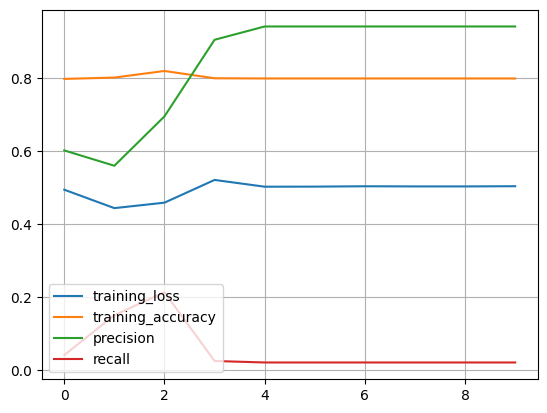

In [ ]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['accuracy'], label = 'training_accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
#lr = 0.01, epochs = 10
model2 = simple_nn(inputLayer)
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model2.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 2s 4ms/step - loss: 0.4227 - accuracy: 0.8259 - precision: 0.7219 - recall: 0.2468 - val_loss: 0.3685 - val_accuracy: 0.8486 - val_precision: 0.7656 - val_recall: 0.3755
Epoch 2/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8482 - precision: 0.7573 - recall: 0.3830 - val_loss: 0.3606 - val_accuracy: 0.8486 - val_precision: 0.8036 - val_recall: 0.3448
Epoch 3/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8572 - precision: 0.7895 - recall: 0.4147 - val_loss: 0.3565 - val_accuracy: 0.8565 - val_precision: 0.7294 - val_recall: 0.4751
Epoch 4/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8565 - precision: 0.7599 - recall: 0.4396 - val_loss: 0.3491 - val_accuracy: 0.8541 - val_precision: 0.7451 - val_recall: 0.4368
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8616 - pr

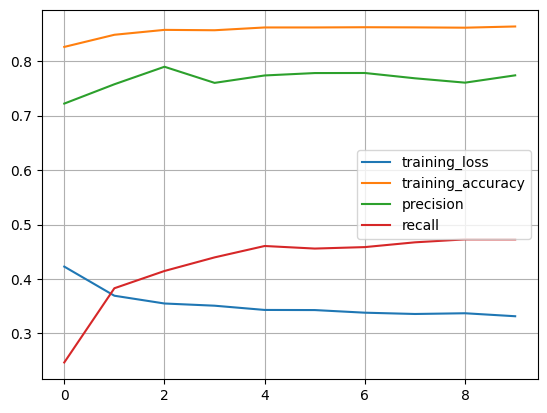

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['accuracy'], label = 'training_accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8624 - precision: 0.7750 - recall: 0.4646 - val_loss: 0.3516 - val_accuracy: 0.8533 - val_precision: 0.7284 - val_recall: 0.4521
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8657 - precision: 0.7809 - recall: 0.4808 - val_loss: 0.3769 - val_accuracy: 0.8478 - val_precision: 0.7134 - val_recall: 0.4291
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8649 - precision: 0.7649 - recall: 0.4936 - val_loss: 0.3493 - val_accuracy: 0.8494 - val_precision: 0.7447 - val_recall: 0.4023
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8674 - precision: 0.7820 - recall: 0.4909 - val_loss: 0.3623 - val_accuracy: 0.8510 - val_precision: 0.7101 - val_recall: 0.4598
Epoch 5/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8704 - pr

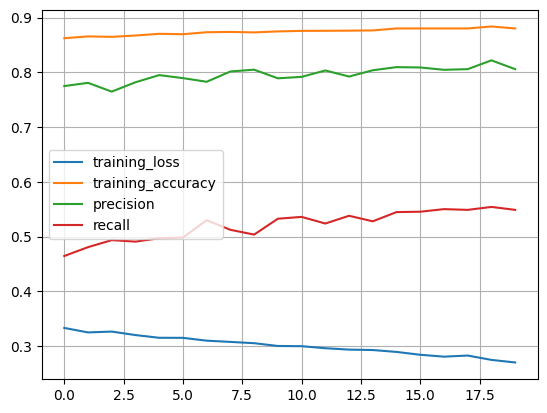

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['accuracy'], label = 'training_accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
history2 = model2.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8829 - precision: 0.7963 - recall: 0.5772 - val_loss: 0.4108 - val_accuracy: 0.8471 - val_precision: 0.6897 - val_recall: 0.4598
Epoch 2/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8853 - precision: 0.8108 - recall: 0.5752 - val_loss: 0.4658 - val_accuracy: 0.8471 - val_precision: 0.6737 - val_recall: 0.4904
Epoch 3/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.8866 - precision: 0.8150 - recall: 0.5792 - val_loss: 0.4271 - val_accuracy: 0.8447 - val_precision: 0.6886 - val_recall: 0.4406
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8882 - precision: 0.8332 - recall: 0.5691 - val_loss: 0.4493 - val_accuracy: 0.8369 - val_precision: 0.6305 - val_recall: 0.4904
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8872 - pr

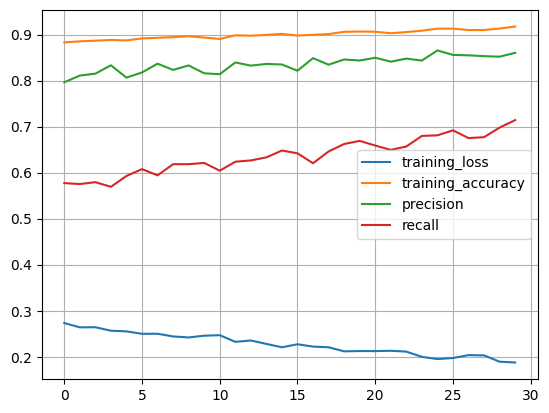

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['accuracy'], label = 'training_accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
#lr = 0.001, epochs = 10
model3 = simple_nn(inputLayer)
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model3.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8248 - precision: 0.7013 - recall: 0.2549 - val_loss: 0.3848 - val_accuracy: 0.8408 - val_precision: 0.7500 - val_recall: 0.3333
Epoch 2/10
226/226 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8494 - precision: 0.7595 - recall: 0.3898 - val_loss: 0.3582 - val_accuracy: 0.8408 - val_precision: 0.7071 - val_recall: 0.3793
Epoch 3/10
226/226 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8537 - precision: 0.7579 - recall: 0.4221 - val_loss: 0.3602 - val_accuracy: 0.8494 - val_precision: 0.8053 - val_recall: 0.3487
Epoch 4/10
226/226 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.8583 - precision: 0.7729 - recall: 0.4383 - val_loss: 0.3576 - val_accuracy: 0.8486 - val_precision: 0.8542 - val_recall: 0.3142
Epoch 5/10
226/226 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8584 - pr

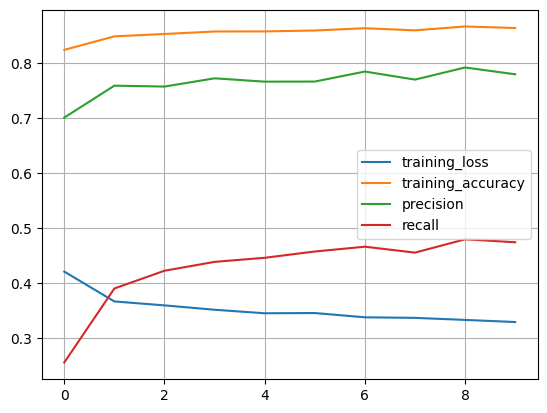

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['accuracy'], label = 'training_accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
history3 = model3.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8653 - precision: 0.7965 - recall: 0.4619 - val_loss: 0.3513 - val_accuracy: 0.8518 - val_precision: 0.7045 - val_recall: 0.4751
Epoch 2/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8641 - precision: 0.7714 - recall: 0.4801 - val_loss: 0.3502 - val_accuracy: 0.8510 - val_precision: 0.7029 - val_recall: 0.4713
Epoch 3/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8702 - precision: 0.7933 - recall: 0.4970 - val_loss: 0.3750 - val_accuracy: 0.8384 - val_precision: 0.6396 - val_recall: 0.4828
Epoch 4/20
226/226 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8689 - precision: 0.7815 - recall: 0.5017 - val_loss: 0.3527 - val_accuracy: 0.8494 - val_precision: 0.7091 - val_recall: 0.4483
Epoch 5/20
226/226 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8728 - pr

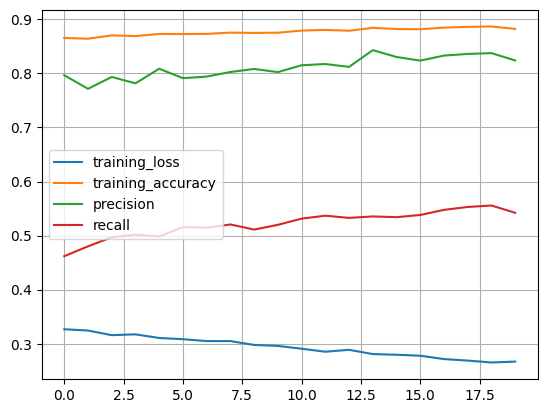

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['accuracy'], label = 'training_accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)

In [ ]:
history3 = model3.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 1s 3ms/step - loss: 0.2610 - accuracy: 0.8904 - precision: 0.8465 - recall: 0.5691 - val_loss: 0.4784 - val_accuracy: 0.8447 - val_precision: 0.6599 - val_recall: 0.4981
Epoch 2/30
226/226 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.8897 - precision: 0.8486 - recall: 0.5630 - val_loss: 0.4825 - val_accuracy: 0.8463 - val_precision: 0.7019 - val_recall: 0.4330
Epoch 3/30
226/226 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.8929 - precision: 0.8584 - recall: 0.5725 - val_loss: 0.4387 - val_accuracy: 0.8455 - val_precision: 0.6951 - val_recall: 0.4368
Epoch 4/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8956 - precision: 0.8584 - recall: 0.5887 - val_loss: 0.4731 - val_accuracy: 0.8384 - val_precision: 0.6667 - val_recall: 0.4215
Epoch 5/30
226/226 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8943 - pr

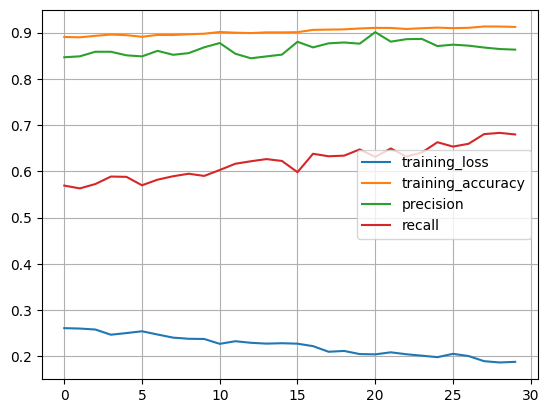

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['accuracy'], label = 'training_accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.legend()
plt.grid(True)